# Data Preprocessing


## Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image 
import plotly.graph_objects as go

In [2]:
sns.set()
plt.style.use('ggplot')
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
from clean_audio import CleanAudio
from file_handler import FileHandler
from audio_vis import AudioVis

In [4]:
clean_audio = CleanAudio()
file_handler = FileHandler()
audio_vis = AudioVis()

## Load Data


In [5]:
PATH_TRAIN_WAV = "../data/AMHARIC/train/wav/"
PATH_TEST_WAV = "../data/AMHARIC/test/wav/"
PATH_TRAIN_TEXT = "../data/AMHARIC/train/text"
PATH_TEST_TEXT = "../data/AMHARIC/test/text"

In [6]:
train_labels = os.listdir(PATH_TRAIN_WAV)
test_labels = os.listdir(PATH_TEST_WAV)
train_labels = [i.strip('.wav') for i in train_labels]
test_labels = [i.strip('.wav') for i in test_labels]
print(f"Total training data: {len(train_labels)}")
print(f"Total test data: {len(test_labels)}")

Total training data: 10875
Total test data: 359


## Remove Outliers

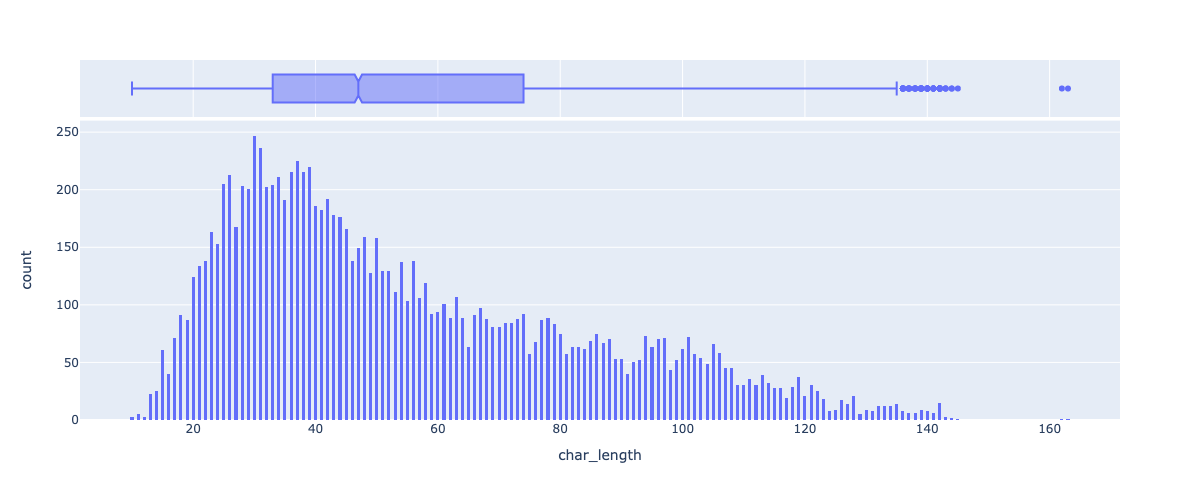

In [ ]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

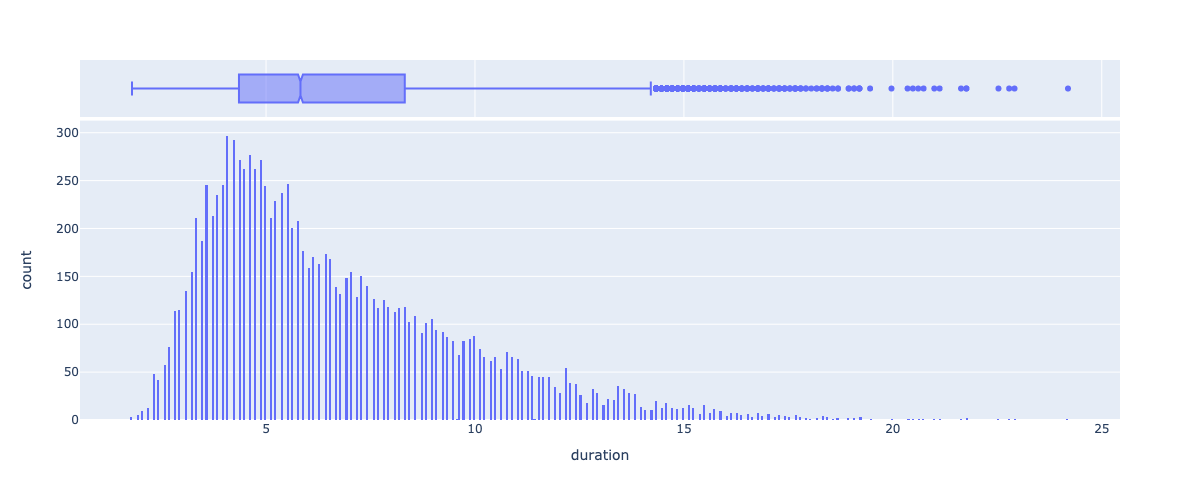

In [ ]:
fig = px.histogram(data, x="duration", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

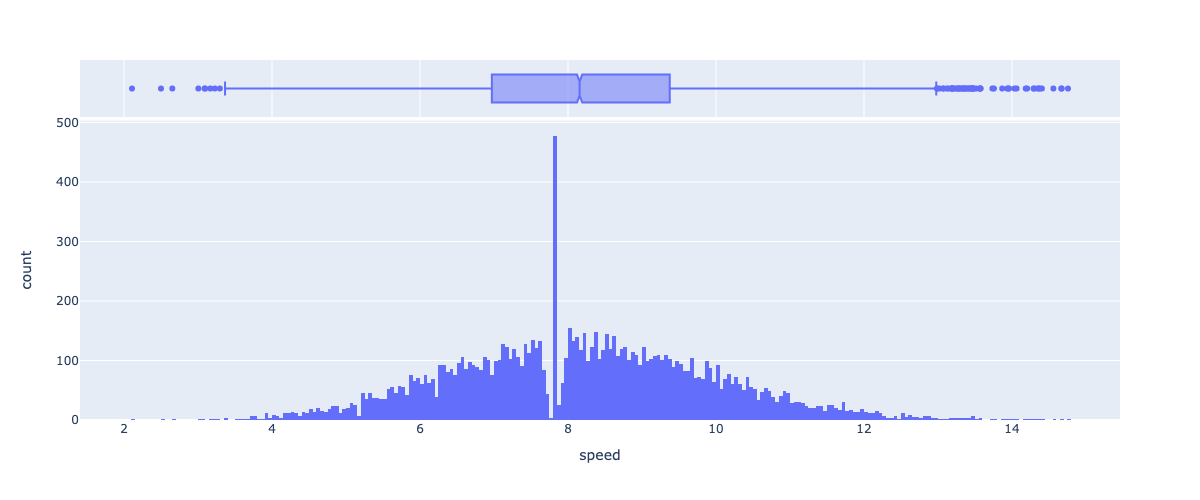

In [ ]:
data["speed"] = data.char_length / data.duration
fig = px.histogram(data, x="speed", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

### Remove the outliers

In [ ]:
initial_size = data.shape[0]
data = data[data['char_length'] > 10]
print(f'percentage of data lost after removing less than 5 character transcriptions: '
      f'{((initial_size-data.shape[0])/initial_size):.4f}%')

percentage of data lost after removing less than 5 character transcriptions: 0.0003%


In [ ]:
initial_size = data.shape[0]
data = data[data['char_length'] < 150]
print(f'percentage of data lost after removing more than 105 character transcriptions: '
      f'{((initial_size-data.shape[0])/initial_size):.4f}%')

percentage of data lost after removing more than 105 character transcriptions: 0.0002%


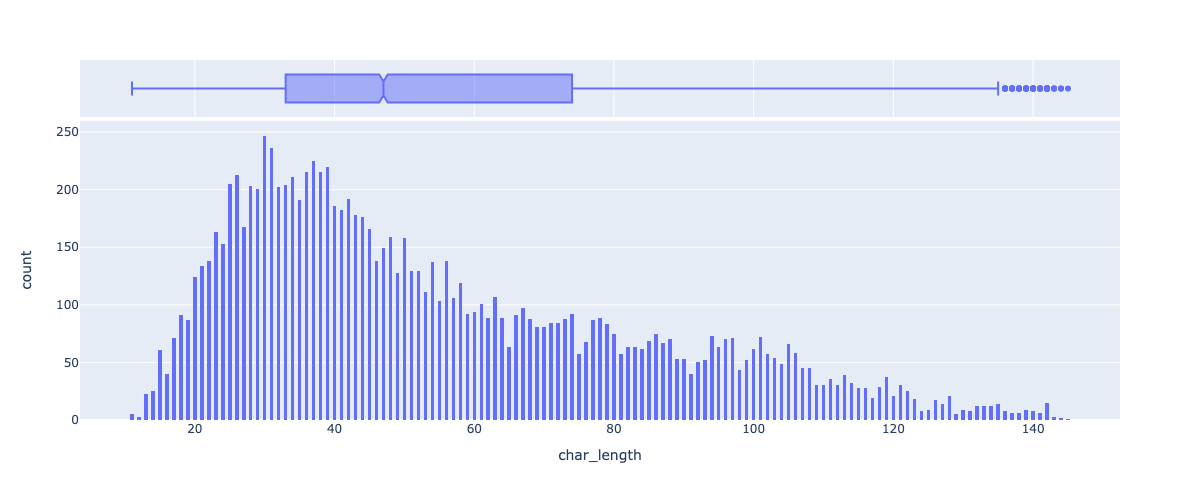

In [ ]:
fig = px.histogram(data, x="char_length", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

In [ ]:
initial_size = data.shape[0]
data = data[data['duration'] > 2]
print(f'percentage of data lost after removing audio files with less than 2 second duration: '
      f'{((initial_size-data.shape[0])/initial_size):.4f}%')


percentage of data lost after removing audio files with less than 2 second duration: 0.0006%


In [ ]:
initial_size = data.shape[0]
data = data[data['duration'] < 18]
print(f'percentage of data lost after removing audio files with more than 18 seconds duration: '
      f'{((initial_size-data.shape[0])/initial_size):.4f}%')


percentage of data lost after removing audio files with more than 18 seconds duration: 0.0029%


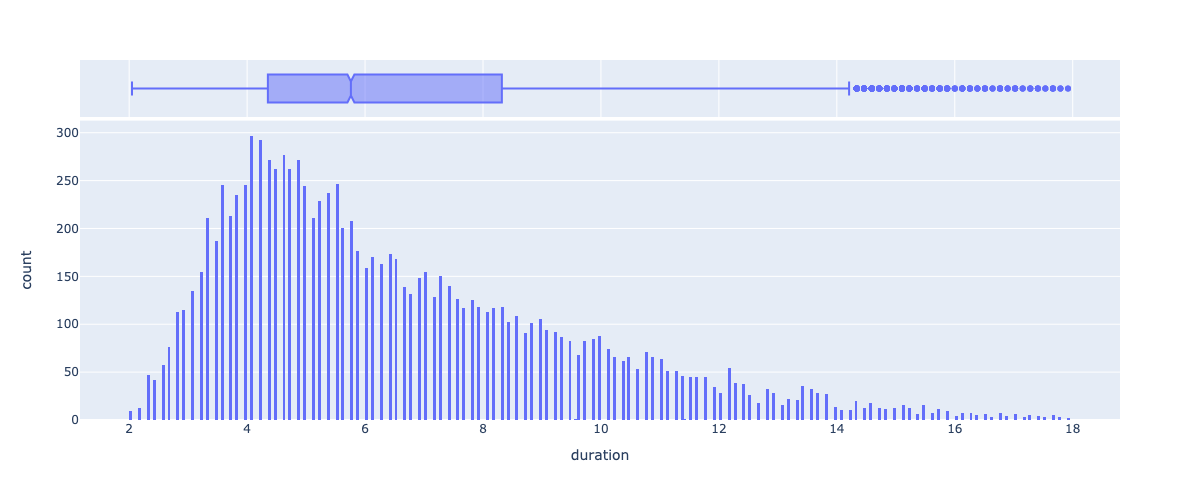

In [ ]:
fig = px.histogram(data, x="duration", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))


In [ ]:
initial_size = data.shape[0]
data = data[data['speed'] > 4]
print(f'percentage of data lost after removing audio files with less than 4 char per second: '
      f'{((initial_size-data.shape[0])/initial_size):.4f}%')

percentage of data lost after removing audio files with less than 4 char per second: 0.0046%


In [ ]:
initial_size = data.shape[0]
data = data[data['speed'] < 14]
print(f'percentage of data lost after removing audio files with greater than 14 char per second: '
      f'{((initial_size-data.shape[0])/initial_size):.4f}%')

percentage of data lost after removing audio files with greater than 14 char per second: 0.0013%


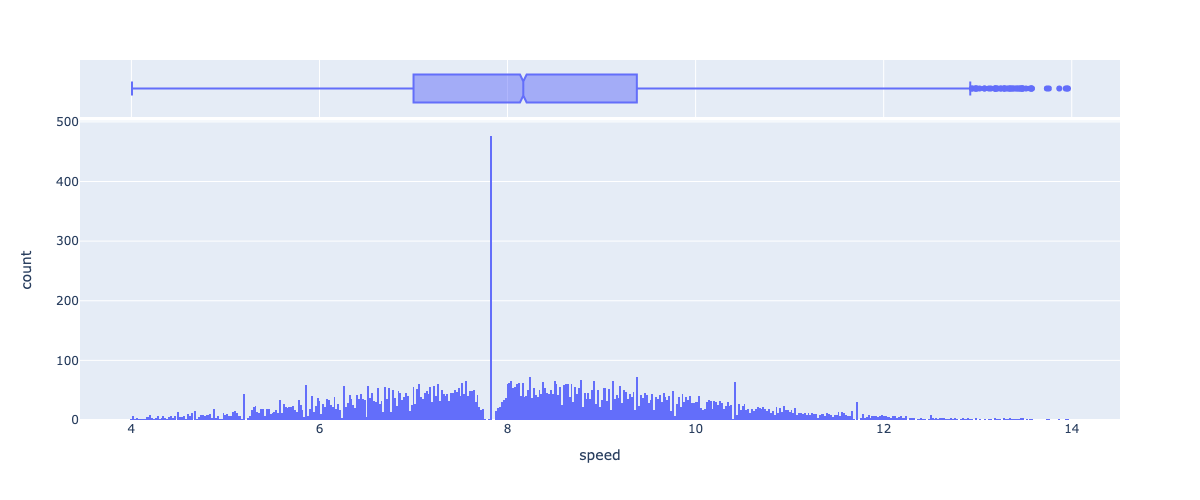

In [ ]:
data["speed"] = data.char_length / data.duration
fig = px.histogram(data, x="speed", marginal="box", nbins=500)
Image(pio.to_image(fig, format='png', width=1200))

## Save the data in numpy format

Saving the data in numpy format will increase the read spread significantly
